# Simple Linear Regression Assumptions Lab (Diagnostics + Inference)

In this lab, you will act as a data analyst evaluating whether linear regression results can be trusted.

You will learn how to:
- Interpret p values
- Read residual plots
- Read QQ plots
- Detect when model assumptions fail

---

## The 4 Assumptions of Linear Regression

1. Linearity
2. Independence
3. Homoscedasticity (constant variance)
4. Normality of residuals

Click here to learn more:https://www.statology.org/linear-regression-assumptions/


# How to Interpret a Residual Plot

A residual plot shows:

- x-axis: predicted values
- y-axis: residuals (errors)

### ✅ What GOOD looks like

You want to see:

- Random cloud of points
- No visible pattern
- Roughly constant vertical spread
- Points centered around zero

### 🚨 Warning signs

Be concerned if you see:

- Curved pattern → nonlinearity
- Funnel shape → heteroscedasticity
- Clusters → dependence issues
- Extreme points → possible outliers

**Key idea:** Residual plots are primarily used to check linearity and constant variance.


# How to Interpret a QQ Plot

A QQ plot compares residuals to a normal distribution.

### ✅ What GOOD looks like
- Points fall roughly along the straight line
- Minor tail deviations are OK

### 🚨 Warning signs
- Strong S shape
- Systematic curvature
- Large tail departures

QQ plots help us judge whether p values are trustworthy.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

np.random.seed(42)
sns.set(style='whitegrid')

# Helper Function

In [3]:
def fit_and_plot(df, title="Model"):
    X = df[['X']] # isolating the independent variable
    y = df['y'] # isolating the dependent variable

    # sklearn fit
    sk_model = LinearRegression() # creating a LinearRegression object
    sk_model.fit(X, y) # training the model, this is where all of the math happens behind the scenes
    y_pred = sk_model.predict(X) # predicting new values of y based on our model
    residuals = y - y_pred # difference between our observed sample y values and predicted y values

    # statsmodels for inference
    X_sm = sm.add_constant(X) # another model using a different package
    sm_model = sm.OLS(y, X_sm).fit() 

    print(f"\n===== {title}: Statsmodels Summary =====")
    display(sm_model.summary())

    fig, axes = plt.subplots(1, 4, figsize=(22, 4)) # create 4 seperate subplots within out output

    # Data + fit
    axes[0].scatter(X, y, alpha=0.7)
    axes[0].plot(X, y_pred)
    axes[0].set_title(f"{title}: Data + Fit")

    # Residuals=
    axes[1].scatter(y_pred, residuals, alpha=0.7)
    axes[1].axhline(0, linestyle='--')
    axes[1].set_title("Residual Plot")

    # Histogram
    sns.histplot(residuals, kde=True, ax=axes[2])
    axes[2].set_title("Residual Distribution")

    # QQ
    sm.qqplot(residuals, line='45', ax=axes[3])
    axes[3].set_title("QQ Plot")

    plt.show()

    return residuals, sm_model

# Dataset 1: Temperature vs Ice Cream Sales (Well Behaved)

**Business question:** Does hotter weather increase ice cream sales?

This dataset was generated to satisfy regression assumptions.

## TODO
- Inspect the residual plot — does it look random?
- Inspect the QQ plot — do points follow the line?
- Check the p value for temperature
- Is the coefficient statistically significant at alpha = 0.05?
- Would you trust this model for inference?


##### **Winni's observations** 
###### Residual Plot inspection - does it look random? Residual = Real value - Predicted value --> e = y - (y hat)... 
###### QQ Plot inspection - do points follow the line? no
###### Temp p value --> X (row) in (column) P>|t| = 0 --> 0 means strong confidence
###### Is coefficient statisically significant at alpha = 0.05? aka change the data/number in helper code block
###### Would you trust this model for inference? 


===== Ice Cream Sales: Statsmodels Summary =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.483e+04
Date:                Thu, 19 Feb 2026   Prob (F-statistic):          2.48e-142
Time:                        19:55:04   Log-Likelihood:                -343.62
No. Observations:                 140   AIC:                             691.2
Df Residuals:                     138   BIC:                             697.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1180      1.667     -0.671      0.503      -4.413       2.177
X              2.5108      0.021    121.789      0.000       2.470       2.552
==============================================================================
Omnibus:                        0.148   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.201
Skew:                           0.076   Prob(JB):                        0.904
Kurtosis:                       2.894   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

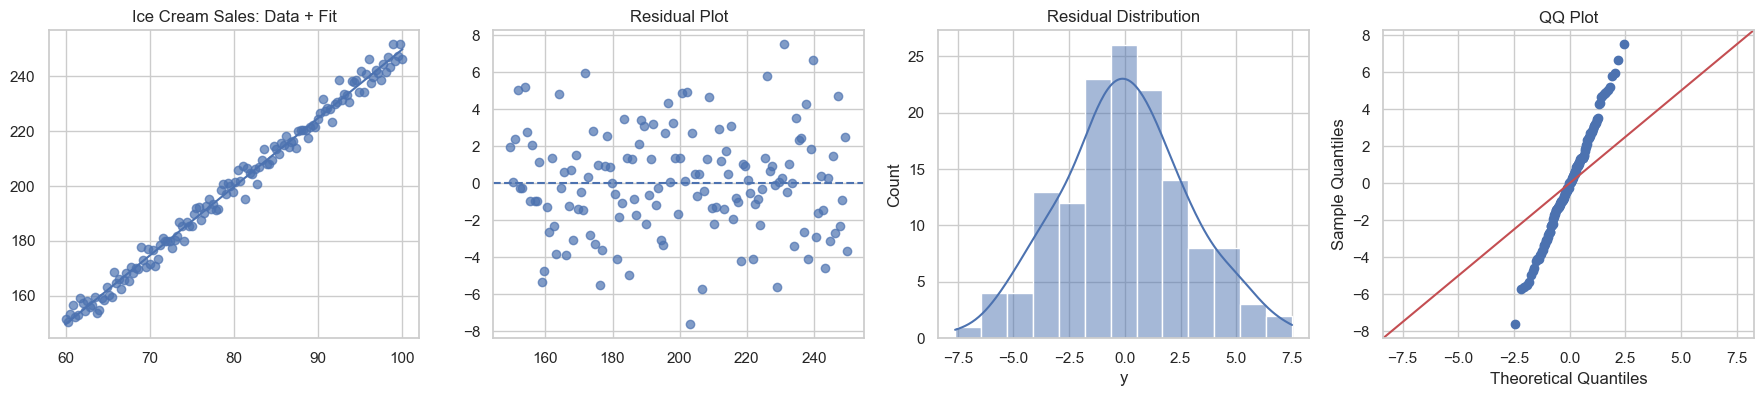

In [4]:
# CLEAN linear data for good QQ plot
X = np.linspace(60, 100, 140) 
noise = np.random.normal(0, 3, size=140)
y = 2.5 * X + noise

# think about what is being constructed here ^

df_good = pd.DataFrame({'X': X, 'y': y})
resid_good, model_good = fit_and_plot(df_good, "Ice Cream Sales")

# Dataset 2: Moderate Nonlinearity

**Scenario:** At very high temperatures, people stay indoors.

## TODO
- What pattern appears in the residual plot?
- Is the coefficient statistically significant?
- Should we trust the p value? Why or why not?


In [ ]:
X = np.linspace(60, 100, 140)
noise = np.random.normal(0, 4, size=140)
y = -0.08*(X-80)**2 + 200 + noise

df_curve = pd.DataFrame({'X': X, 'y': y})
resid_curve, model_curve = fit_and_plot(df_curve, "Moderate Nonlinearity")

# Dataset 3: Extreme Nonlinearity

**Scenario:** Energy drink consumption vs hours awake.

## TODO
- Describe the residual pattern
- Is the coefficient statistically significant?
- Why is significance not enough here?
- What model family might work better?


In [ ]:
X = np.linspace(0, 24, 160)
noise = np.random.normal(0, 0.4, size=160)
y = 10 * (1 - np.exp(-0.25 * X)) + noise

df_extreme = pd.DataFrame({'X': X, 'y': y})
resid_extreme, model_extreme = fit_and_plot(df_extreme, "Extreme Nonlinearity")

# Dataset 4: Heteroscedasticity

**Scenario:** Advertising spend vs revenue.

## TODO
- What shape appears in the residual plot?
- Is the coefficient statistically significant?
- How might heteroscedasticity affect the reliability of the p value?


In [ ]:
X = np.linspace(0, 100, 140)
noise = np.random.normal(0, X * 0.25)
y = 5 * X + noise

df_hetero = pd.DataFrame({'X': X, 'y': y})
resid_hetero, model_hetero = fit_and_plot(df_hetero, "Heteroscedasticity")

# Dataset 5: Outliers

**Scenario:** Most stores follow the trend, but a few extreme reporting errors exist.

## TODO
- Compare the coefficient to Dataset 1
- Is the coefficient still statistically significant?
- How do the outliers appear in the residual plot and QQ plot?
- Why are outliers dangerous for inference?


In [ ]:
X = np.linspace(60, 100, 140)
noise = np.random.normal(0, 3, size=140)
y = 2.5 * X + noise

X_out = np.append(X, [65, 98])
y_out = np.append(y, [500, -100])

df_outliers = pd.DataFrame({'X': X_out, 'y': y_out})
resid_outliers, model_outliers = fit_and_plot(df_outliers, "Outliers Present")

# Final Reflection

## TODO

1. When can a coefficient be statistically significant but misleading?
2. Which residual pattern worried you the most?
3. Which assumption violations most threaten valid p values?
4. What diagnostics would you always check before reporting results?

---


Although we've created the datasets for you this time around, check out how you would run linear regression on a dataframe here: https://www.datacamp.com/tutorial/sklearn-linear-regression